In [2]:
from config.config import Config
from models.load_model import Model
from utils.data_utils import generate_prompts
from utils.compute_utils import compute_avg_distances


model_name = Config.MODEL_NAME
device = Config.DEVICE
model = Model(model_name, device)

# create Data from groups
k = 20                              # numner of example drawn from every group
num_examples = 4                    # number of context examples
upper_bound = 1000                  # raenge of contex examples
groups = [2,3]
# interval function as descried in overleaf  experiemnt 1 version 2.
interval_function = lambda i: range(10**i - 2 * 10**(i-1), 10**i + 2 * 10**(i-1))
# interval_function = lambda i: range(10**i - 2 * 10, 10**i + 2 * 10)
prompts = generate_prompts(k, num_examples, upper_bound,groups,interval_function)




In [ ]:
for i in range(1900,2000):
    print(model.tokenizer(str(i)))

In [14]:
print(model.tokenizer(str('=10000')))

{'input_ids': [28, 49388], 'attention_mask': [1, 1]}


In [15]:
print(model.tokenizer(str('= 10000')))

{'input_ids': [28, 33028], 'attention_mask': [1, 1]}


In [4]:
prompts[2][0]

'103=103,116=116,110=110,98=98,103='

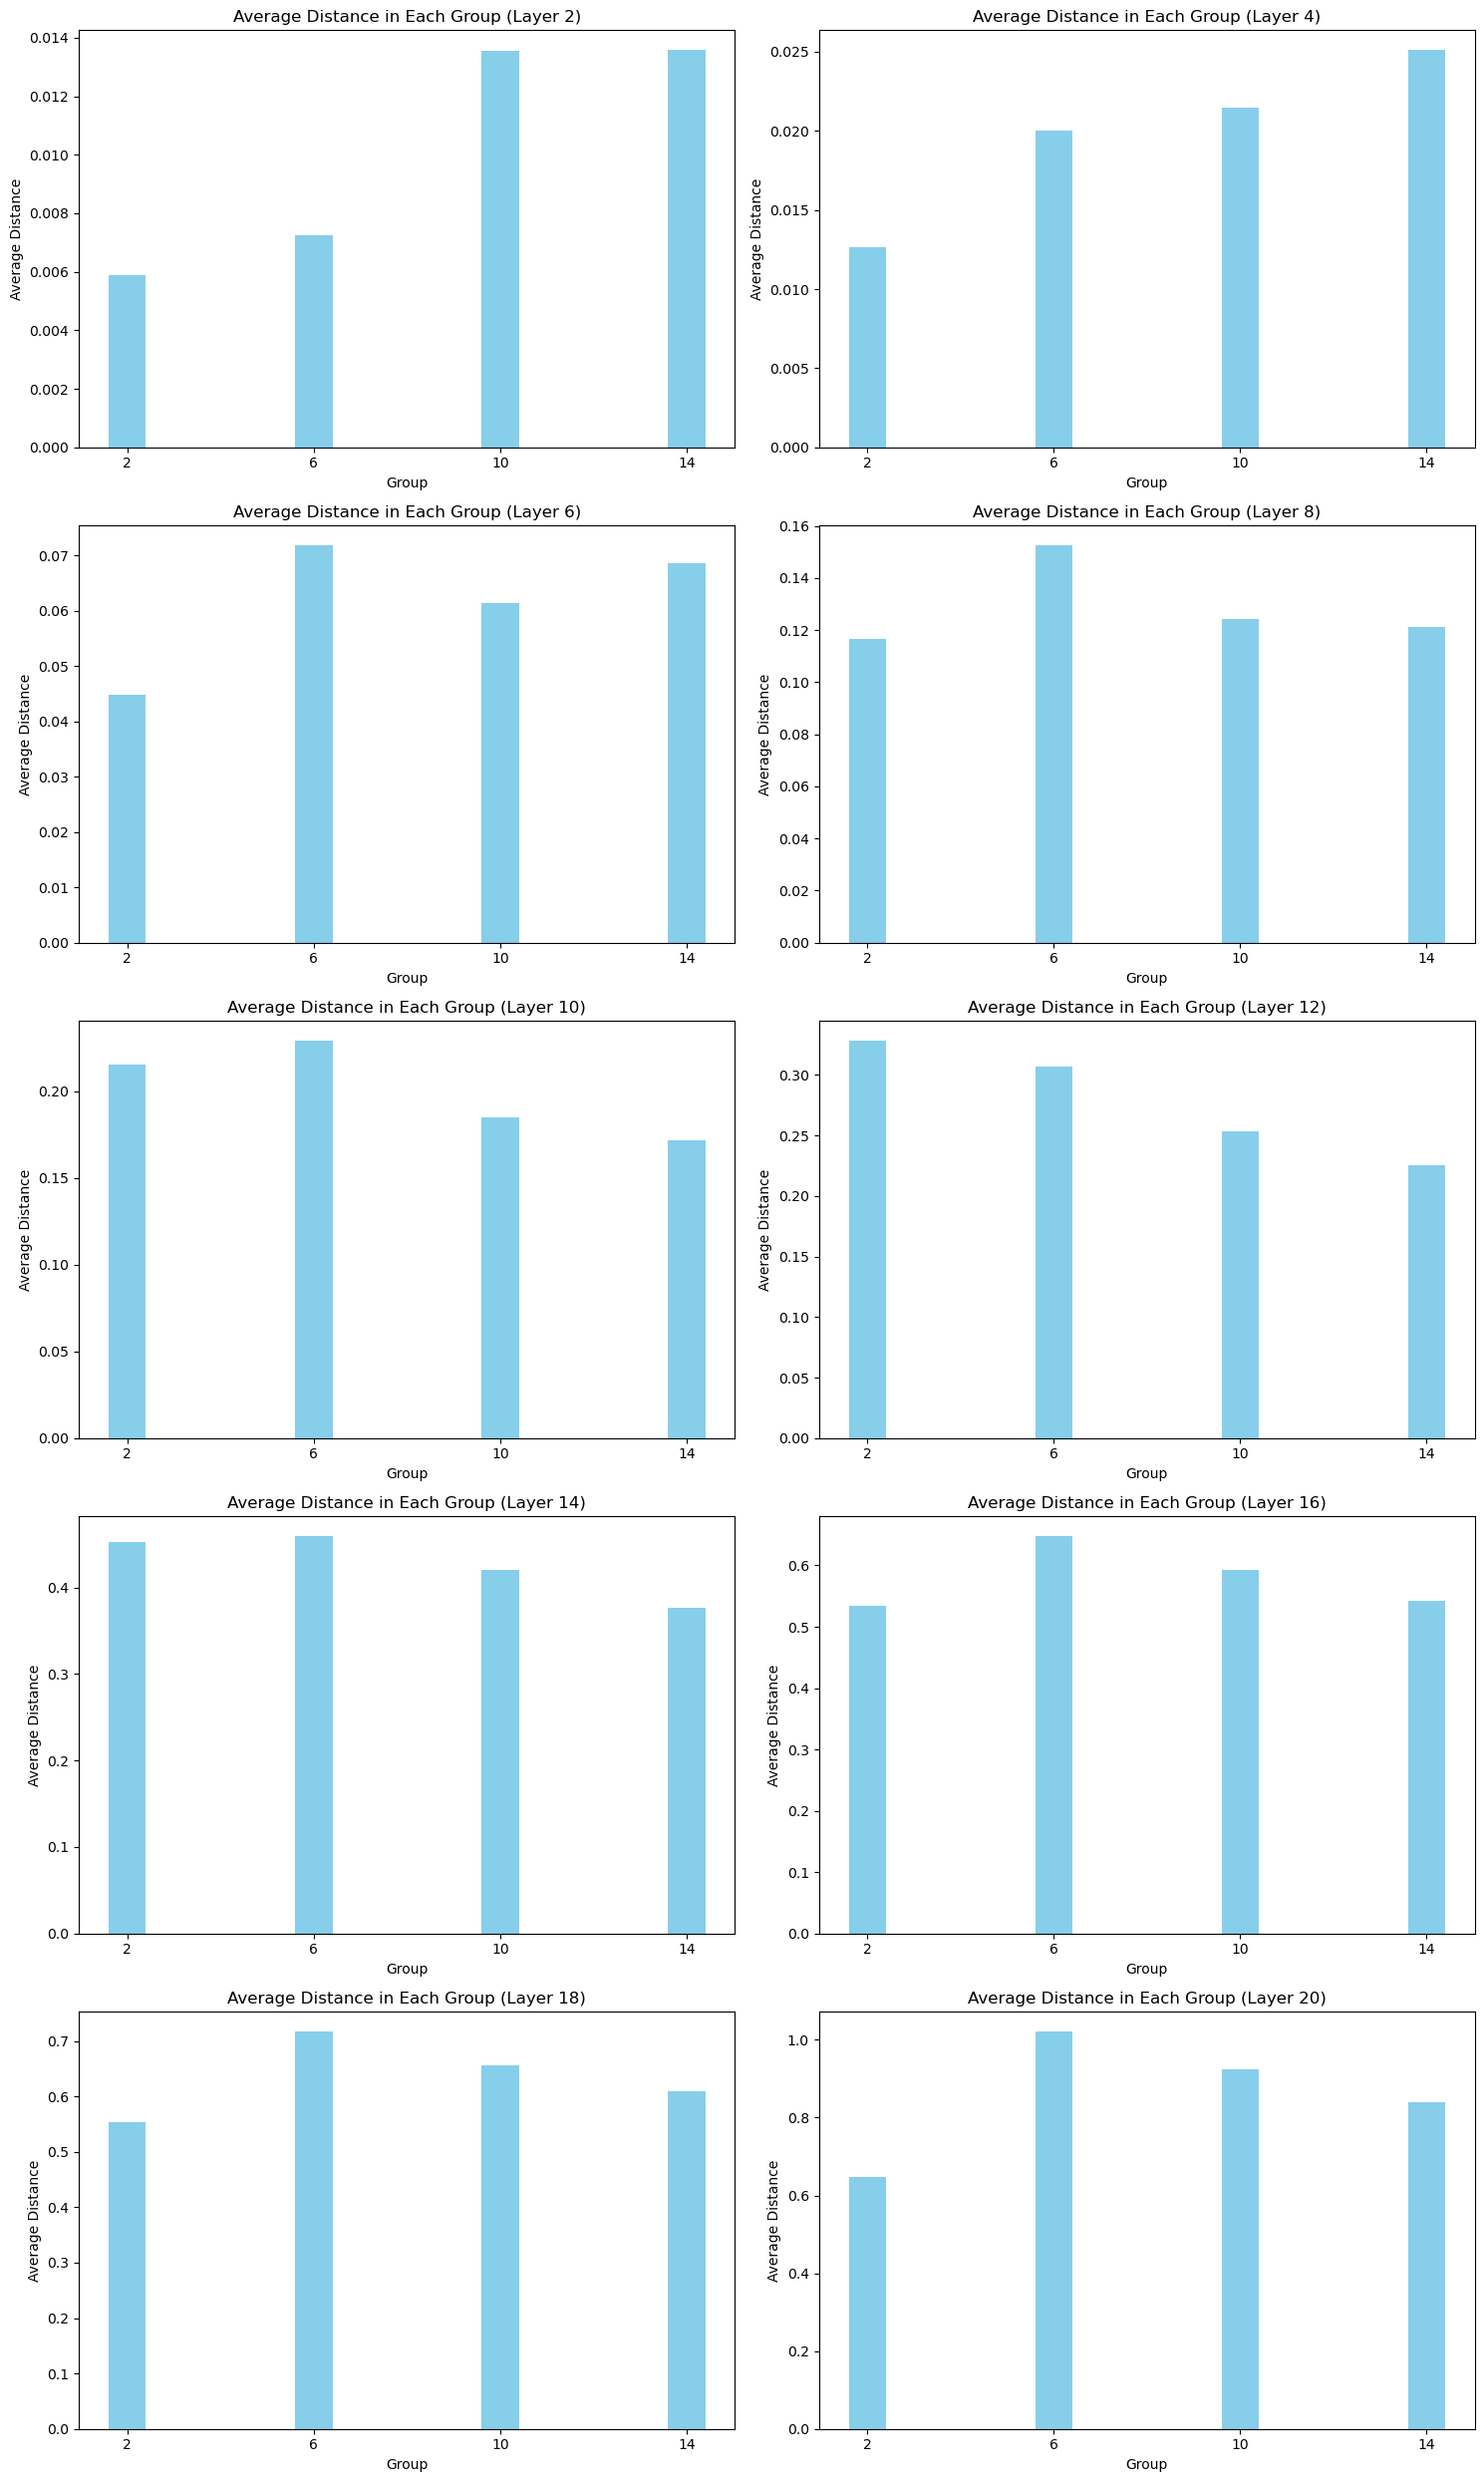

In [2]:
import matplotlib.pyplot as plt
# Get Hidden States for Each Prompt
layers = list(range(2, 21, 2))
fig, axs = plt.subplots(5, 2, figsize=(15, 25))

for idx, layer in enumerate(layers):
    hidden_states = {}
    for key, prompt_list in prompts.items():
        hidden_states[key] = []
        for prompt in prompt_list:
            hidden_state = model.get_hidden_state(prompt, layer_index=layer)
            hidden_states[key].append(hidden_state)

    distances = compute_avg_distances(hidden_states, metric='cosine')

    keys = list(distances.keys())
    values = list(distances.values())

    ax = axs[idx // 2, idx % 2]
    ax.bar(keys, values, color='skyblue')
    ax.set_xlabel('Group')
    ax.set_ylabel('Average Distance')
    ax.set_title(f'Average Distance in Each Group (Layer {layer})')
    ax.set_xticks(keys)

plt.tight_layout()
plt.show()